lungImg_0.png


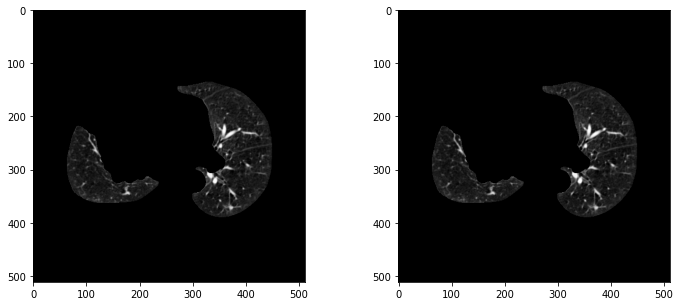

lungImg_1.png


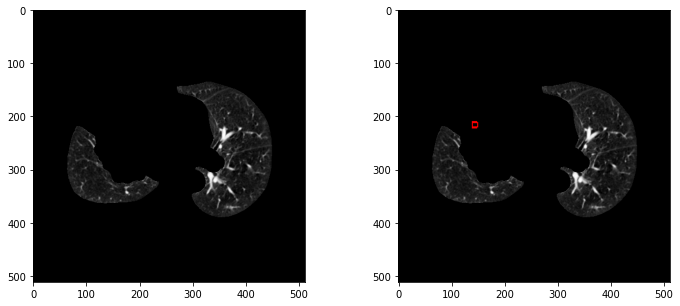

lungImg_2.png


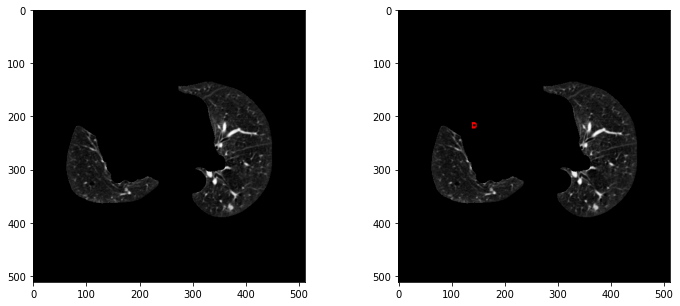

lungImg_3.png


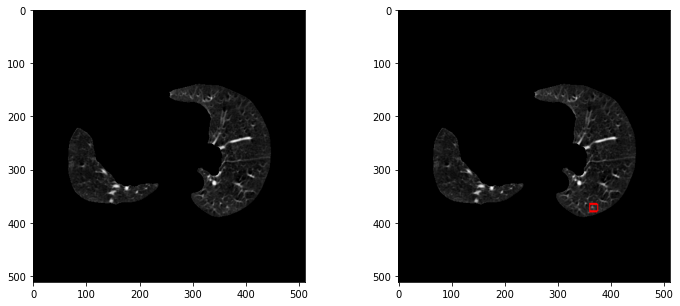

lungImg_4.png


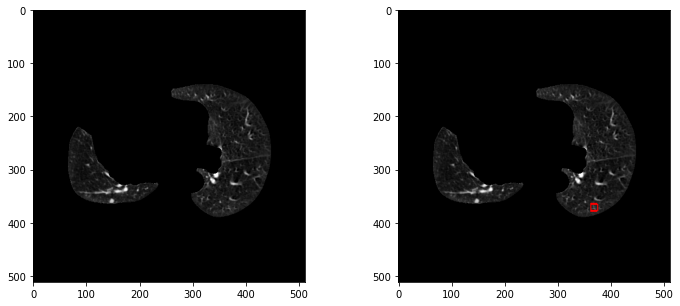

In [27]:
import re
import cv2
import matplotlib.pyplot as plt

def getBoxes(annotPath,classList):
    if ".xml" in annotPath: # Pascal VOC
        xml = open(annotPath,"r").read()
        nameL = re.findall("<name>(.*)</name>",xml)
        xminL = re.findall("<xmin>(.*)</xmin>",xml)
        yminL = re.findall("<ymin>(.*)</ymin>",xml)
        xmaxL = re.findall("<xmax>(.*)</xmax>",xml)
        ymaxL = re.findall("<ymax>(.*)</ymax>",xml)
        L = []
        for name,xmin,ymin,xmax,ymax in zip(nameL,xminL,yminL,xmaxL,ymaxL):
            L.append( (classList.index(name),int(xmin),int(ymin),int(xmax),int(ymax)) )
        return L

def show(imgPath,annotPath,classList):
    img0 = cv2.imread(imgPath)
    img  = img0.copy()
    boxes = getBoxes(annotPath,classList)
    color = [ (255,0,0), (0,255,0), (0,0,255) ]
    for cid,xmin,ymin,xmax,ymax in boxes:
        img[ymin-2:ymin+2,xmin:xmax,0] = color[cid][0]
        img[ymin-2:ymin+2,xmin:xmax,1] = color[cid][1]
        img[ymin-2:ymin+2,xmin:xmax,2] = color[cid][2]
        img[ymax-2:ymax+2,xmin:xmax,0] = color[cid][0]
        img[ymax-2:ymax+2,xmin:xmax,1] = color[cid][1]
        img[ymax-2:ymax+2,xmin:xmax,2] = color[cid][2]
        img[ymin:ymax,xmin:xmin+2,0] = color[cid][0]
        img[ymin:ymax,xmin:xmin+2,1] = color[cid][1]
        img[ymin:ymax,xmin:xmin+2,2] = color[cid][2]
        img[ymin:ymax,xmax:xmax+2,0] = color[cid][0]
        img[ymin:ymax,xmax:xmax+2,1] = color[cid][1]
        img[ymin:ymax,xmax:xmax+2,2] = color[cid][2]
    ax = plt.figure(figsize=(12,5))
    ax.set_facecolor("white")
    plt.subplot(1,2,1)
    plt.imshow(img0)
    plt.subplot(1,2,2)
    plt.imshow(img)
    plt.show()

for i in range(5):
    print(f"lungImg_{i}.png")
    show(f"yolov4/LIDC-IDRI/mask_image/lungImg_{i}.png", f"yolov4/LIDC-IDRI/xml/noduleMask_{i}.xml", ["nodule"])